## Zadanie 3
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału 𝑠[𝑛] = 𝐴 (1 − (𝑛 𝑚𝑜𝑑 𝑁)/
𝑁 ) o amplitudzie 𝐴 = 3 i okresie podstawowym 𝑁 = 11. W tym celu dla
każdej wartości 𝑁0 ∈ {0,1𝑁, 4𝑁, 9𝑁} wykreślić widmo amplitudowe i fazowe sygnału 𝑠[𝑛]
dopełnionego 𝑁0 zerami. Skomentować otrzymane wyniki.

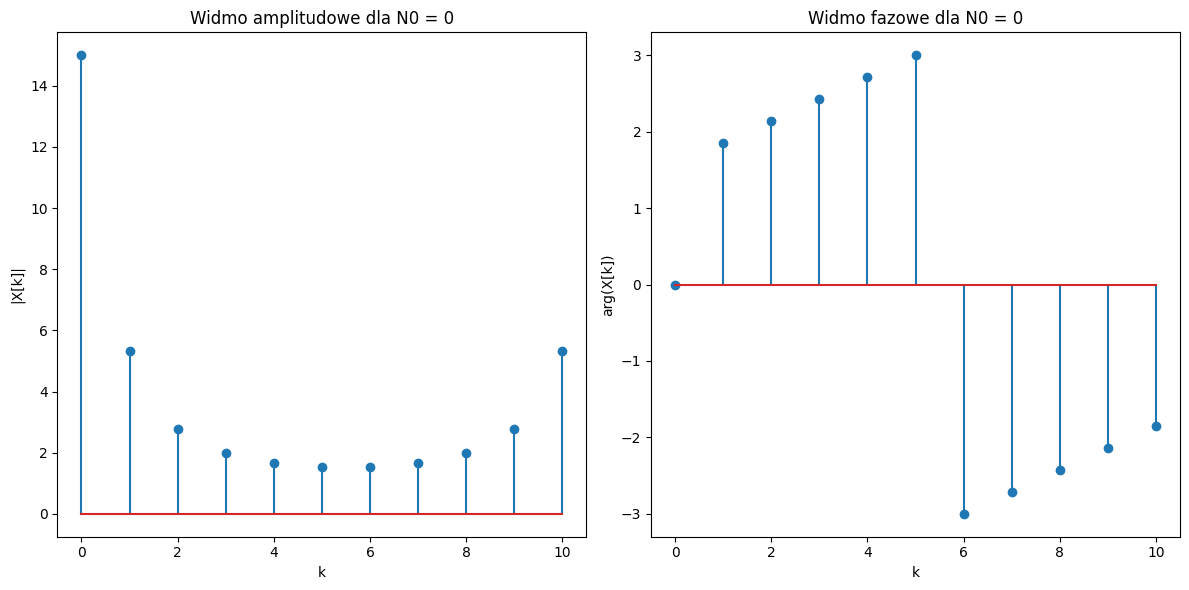

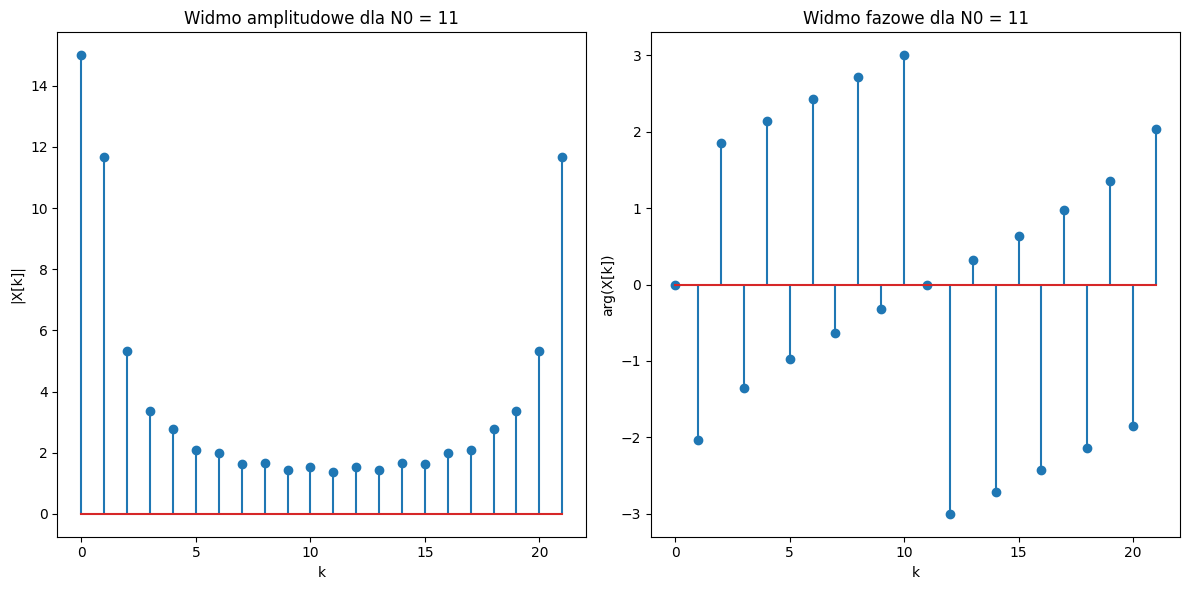

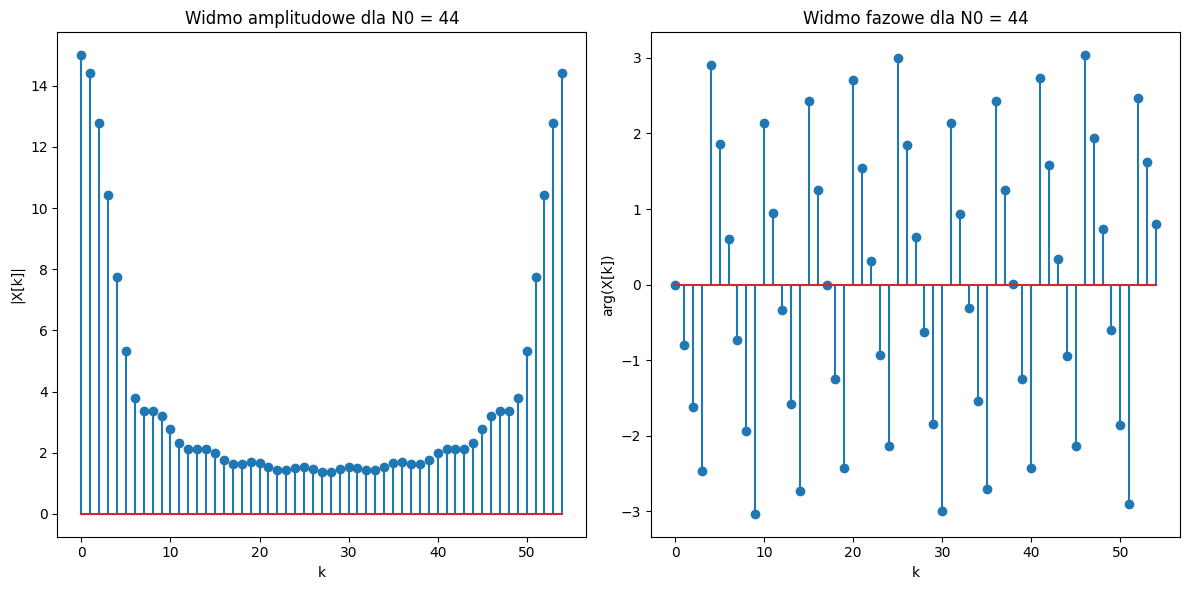

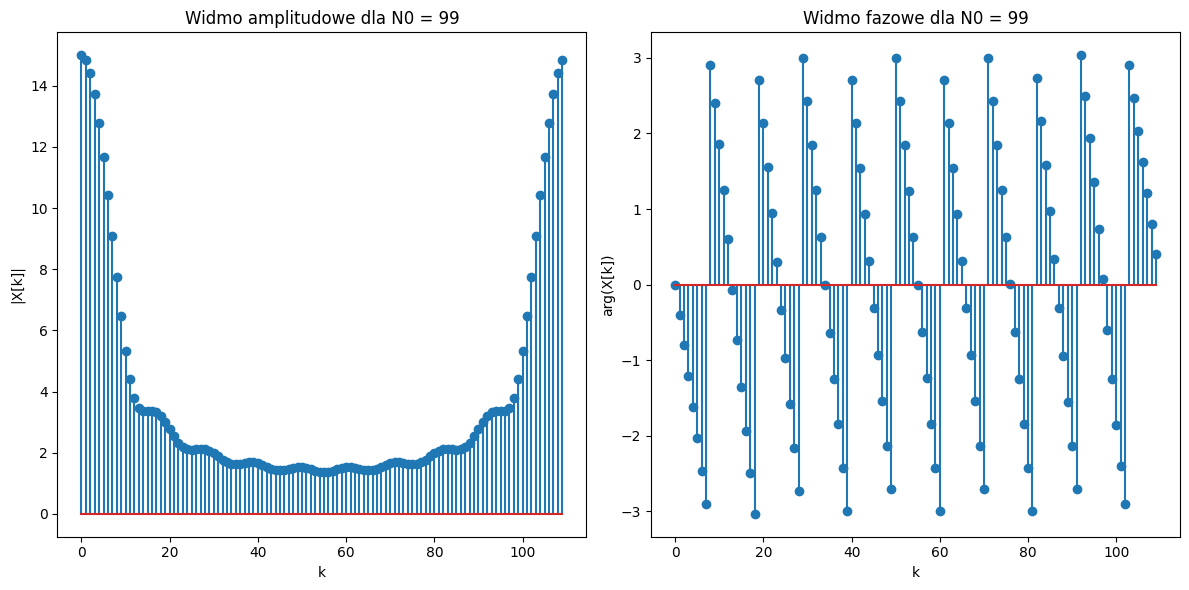

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#funkcja calculate odopenia sygna zerami
def calculate(n, zero_count, A, N):
    signal = A * (1 - ((n % N) / N))
    signal_zeros = np.concatenate((signal, np.zeros(zero_count)))
    return signal_zeros

def main():
    #ustalenie wartosi zmiennych zgodnie z parametrami zadania
    A = 3
    N = 11
    N0 = [0, N, 4*N, 9*N]
    n = np.arange(0, N)
    for zero_count in N0:
        x = calculate(n, zero_count, A, N)
        X = np.fft.fft(x)
        #filtorwanie malych liczb
        for xi in X:
            if (xi.imag < 1e-10 or xi.real < 1e-10):
                xi = 0

        plt.figure(figsize=(12, 6))

        #wykres widma amplitudowego
        plt.subplot(1, 2, 1)
        plt.stem(np.arange(0, N+zero_count), np.abs(X))
        plt.title(f"Widmo amplitudowe dla N0 = {zero_count}")
        plt.xlabel("k")
        plt.ylabel("|X[k]|")

        #wykres widma fazowego
        plt.subplot(1, 2, 2)
        plt.stem(np.arange(0, N+zero_count), np.angle(X))
        plt.title(f"Widmo fazowe dla N0 = {zero_count}")
        plt.xlabel("k")
        plt.ylabel("arg(X[k])")

        plt.tight_layout()
        plt.show()

main()